<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3 - Evaluación de Modelos de Clasificación Módulo Análisis de Datos, EMI2016-1, 1° Semestre 2019

**Alumno: Felipe Quezada Gajardo**

**Instrucciones**

* (i) Separar los datos en un conjunto de Entrenamiento y otro de Testeo respetando la proporción existente entre 1 y 0 en la variable objetivo.
* (ii) Utilizar los datos de entrenamiento para estimar dos modelos predictivos (Adaline y Regresión Logistica).
* (iii) Estimar el error esperado fuera de la muestra para los dos predictores constuirdos utilizando los datos
de Testeo.
* (iv) Calcular otro estimador del error fuera de la muestra de ambos modelos utilizando Cross Validation
(con 5 subconjuntos)
* (v) Construir la matriz de confusión para ambos modelos. Además plotear la curva ROC y calcular el
AUC.
* (vi) En base a los resultados obtenidos señalar si alguno de los dos modelos es preferible, e indicar un
valor de corte para el predictor recomendable de acuerdo a la naturaleza del problema.

In [0]:
# Import de dependencias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt

In [0]:
# Para subir el archivo a Collabs 
# Se debe cargar el archivo Datos_de_compra_retail.xlsx desde nuestro PC.
from google.colab import files
uploaded = files.upload()

Saving Datos_de_compra_retail.xlsx to Datos_de_compra_retail (1).xlsx


In [103]:
# Cargamos el archivo .xlsx a una Variable
import io
compras_retail = pd.ExcelFile(io.BytesIO(uploaded['Datos_de_compra_retail.xlsx']))

#print(compras_retail)

# Se lée la hoja Trainig Data del archivo excel
training_data = pd.read_excel(compras_retail, sheet_name=0)
#print(df_accounts)
training_data.head()

# Se elimina la columna vacia ya que no es necesaria
training_data = training_data.drop('Unnamed: 17', 1)


print(training_data.shape)

(1000, 18)


In [104]:
# Se realiza una separacion en categorias
d_genero = pd.get_dummies(training_data['Implied Gender'], prefix='Genero')
print(d_gender.head())

   Genero_F  Genero_M  Genero_U
0         0         1         0
1         0         1         0
2         0         1         0
3         0         0         1
4         1         0         0


In [105]:

# Se realiza la separacion en categorias 
d_residencia = pd.get_dummies(training_data['Home/Apt/ PO Box'], prefix='Recidencia')
print(d_resident.head())

   Recidencia_A  Recidencia_H  Recidencia_P
0             1             0             0
1             0             1             0
2             0             1             0
3             0             1             0
4             1             0             0


In [106]:
# Se realiza la limpieza de los datos, se eliminar las siguientes columnas
training_data= training_data.drop('Implied Gender', 1)
training_data= training_data.drop('Home/Apt/ PO Box', 1)

# Se integran las siguientes columnas
data = pd.concat([d_genero.ix[:, 'Genero_M':],d_residencia.ix[:, 'Residencia_H':],training_data[cols_to_keep]], axis=1)

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,Genero_M,Genero_U,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [107]:
# Creacion de matrices
# Se obitienen exclusivamente los datos numericos de la matriz.
matriz_numerica=training_data.values
print(matriz_numerica)

cantCaract = len(matriz_numerica[0])

print(cantCaract)

# Matriz de caracteristicas
M_Caracterisiticas = matriz_numerica[:,0:cantCaract-1]

print("matriz de Caracteristicas")
print(M_Caracterisiticas)

# Matriz objetivo
M_Objetivo = matriz_numerica[:,cantCaract-1]

print("matriz de Objetivo")
print(M_Objetivo)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
16
matriz de Caracteristicas
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
matriz de Objetivo
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [108]:
# Separacion de datos (Entrenamieto y Prueba)
from sklearn.model_selection import train_test_split
# Se establece la proporcion de 1/2 ya que son 500 embarazos y 500 no embarazos
prop = 0.50


# Se divide y entrenan los datos utilizando el objeto train_test_split de SKLEARN
A_entrenamiento, A_prueba, B_entrenamiento, B_prueba = train_test_split(M_Caracterisiticas, M_Objetivo,
train_size=prop,test_size=prop, random_state=1)

# Se imprimen por consola los datos de entrenamiento
print ("X_entrenamiento: ", A_entrenamiento)
print ("Y_entrenamiento: \n", B_entrenamiento)

# Se imprimen por consola los datos de prueba
print("X_testeo: ", A_prueba)
print ("Y_testeo: \n", B_prueba)


X_entrenamiento:  [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Y_entrenamiento: 
 [0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0
 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 1 1 1 0 0 1 0 0

In [145]:

# Estimacion de Modelos Adaline y Regresion Logistica y Calculo de Error.


adaline = SGDRegressor(random_state=1)
adaline.fit(A_entrenamiento, B_entrenamiento)

y_prediccionAdaline = adaline.predict(A_prueba)

print("Adaline")

print('Precisión: {:.2f}'.format(adaline.score(A_prueba, B_prueba)))

print('Error : {:.2f}\n'.format(1 - adaline.score(A_prueba, B_prueba)))



logreg = LogisticRegression(solver='lbfgs', random_state=1)
logreg.fit(A_entrenamiento, B_entrenamiento)

y_prediccionRegresion = logreg.predict(A_prueba)


print("Regresion Logistica")
print('Precisión: {:.2f}'.format(logreg.score(A_prueba, B_prueba)))

print('Error : {:.2f}\n'.format(1 - logreg.score(A_prueba, B_prueba)))



Adaline
Precisión: 0.44
Error : 0.56

Regresion Logistica
Precisión: 0.86
Error : 0.14



In [146]:
# Estimacion de Error Esperado con datos de Prueba (Cross Validator)

modelos = []

# Se agrega Adaline
modelos.append(('ADALINE', SGDRegressor()))

# Se agrega regresión logistica 
modelos.append(('Regresión Logistica', LogisticRegression(solver='lbfgs')))


resultados = []
nombres = []

print("Cross Validation Resultados")
for nombre, modelo in modelos:
    kfold = KFold(n_splits=5, random_state=seed)
    resultadoTemp = cross_val_score(modelo, A_prueba, B_prueba, cv=kfold, scoring='neg_mean_absolute_error')
    resultados.append(resultadoTemp)
    nombres.append(nombre)
    mensaje = "Error %s: %f" % (nombre, resultadoTemp.mean())
    print(mensaje)

Cross Validation Resultados
Error ADALINE: -0.331913
Error Regresión Logistica: -0.150000


In [147]:

# Matriz de Confusion para Adeline y Regresion Logistica


print("Matriz de confusion Adaline")
print("Precisión: %s" % accuracy_score(B_prueba, y_prediccionAdaline.round()))
print("Matriz de Confusion:\n")
print(confusion_matrix(B_prueba, y_prediccionAdaline.round()))

print(classification_report(B_prueba, y_prediccionAdaline.round()))


print("Matriz de confusion Regresión Logistica")
print("Precisión: %s" % accuracy_score(B_prueba, y_prediccionRegresion))
print("Matriz de confusion:\n")
print(confusion_matrix(B_prueba, y_prediccionRegresion))

print(classification_report(B_prueba, y_prediccionRegresion))



Matriz de confusion Adaline
Precisión: 0.846
Matriz de Confusion:

[[230  18]
 [ 59 193]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       248
           1       0.91      0.77      0.83       252

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500

Matriz de confusion Regresión Logistica
Precisión: 0.856
Matriz de confusion:

[[228  20]
 [ 52 200]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       248
           1       0.91      0.79      0.85       252

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



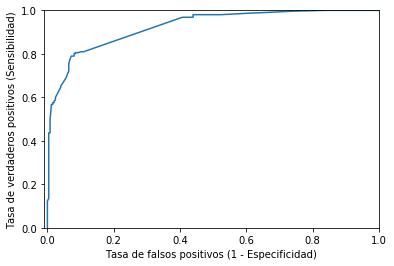

In [138]:
# Se calcula la probabilidad.
y_pred_prob = logreg.predict_proba(A_prueba)[:, 1]

# plotear la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(B_prueba, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos (1 - Especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensibilidad)')
plt.show()

In [139]:
# AUC Regresión Logistica #

AUC_RL =  metrics.roc_auc_score(B_prueba, y_pred_prob)
print("AUC Regresión logística")
print(AUC_RL)

# AUC Adeline #

AUC_AD= metrics.roc_auc_score(B_prueba, adaline.predict(A_prueba))
print("AUC Adeline")
print(AUC_AD)

AUC Regresión logística
0.9259152585765489
AUC Adeline
0.9208429339477726
